# KNN (K-Neared Neighbors)

## Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Reading Data

In [33]:
df = pd.read_csv("teleCust1000t.csv")
print(df.shape, "\n")
print(df["custcat"].value_counts(), "\n")
df.head()

(1000, 12) 

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64 



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Histogram

array([[<Axes: title={'center': 'income'}>]], dtype=object)

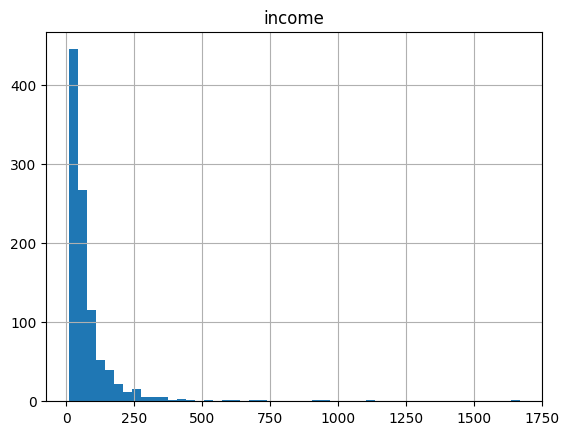

In [34]:
df.hist(column="income", bins=50)

## Separating Data

In [44]:
print(df.columns)
x_data = df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside"]]
y_data = df[["custcat"]]

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


## Normalizing Data

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_data) # scaler calculates mean and std of x_data
x_data = scaler.transform(x_data.astype(float)) # new_x = (x_data - mean) / std --> new_mean = 0 & new_std = 1
x_data

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]], shape=(1000, 11))